###  Rough Draft 

# Training Data Development and Modeling

In [22]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('data/pre_processed_data_5_clusters_with_PIE.csv')

In [5]:
df.head()

,Player,PIE_2018,PIE_2017,AGE,MIN_2017,GP,W,L,PTS,FGM,3P%,FTM,FT%,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,Height,Weight,Draft_Number,%_Box_Outs_Off,%_Box_Outs_Def,%_Team_RebWhen_Box_Out,%_Player_RebWhen_Box_Out,ContestedREB%,DeferredREB_Chances,AdjustedREB_Chance%,AVG_REBDistance,PassesMade,PassesReceived,SecondaryAST,ASTAdj,AST_ToPass%_Adj,ScreenAssists_PTS,Deflections,%_Loose_BallsRecovered_OFF,%_Loose_BallsRecovered_DEF,ChargesDrawn,Contested2PT_Shots,Contested3PT_Shots,FGM_und_5ft,FG%_und_5ft,FGM_5_9ft,FG%_5_9ft,FGM_10_14ft,FG%_10_14ft,FGM_15_19ft,FG%_15_19ft,OPP_FGM_und_5ft,OPP_FG%_und_5ft,OPP_FGM_5_9ft,OPP_FG%_5_9ft,OPP_FGM_10_14ft,OPP_FG%_10_14ft,OPP_FGM_15_19ft,OPP_FG%_15_19ft,OPP_FGM_20_24ft,OPP_FG%_20_24ft,OPP_FGM_25_29ft,OPP_FG%_25_29ft,DEFRTG,NETRTG,AST%,OREB%,DREB%,eFG%,TS%,USG%,PACE,cluster_five_1,cluster_five_2,cluster_five_3,cluster_five_4
0,Aaron Gordon,10.9,0.599522,-1.141838,1.309109,-0.173463,-0.644696,0.749324,1.263600,1.283885,0.203858,1.099042,-0.567144,0.839688,0.782363,1.160474,0.082474,1.284137,1.498676,-0.289077,-0.517186,0.531658,0.066010,-1.366031,-0.212155,0.414067,-0.371244,0.096483,0.419543,1.052409,1.001736,-0.494928,0.924277,0.489732,-0.095633,0.470303,-0.453438,0.555441,0.260834,0.088749,-0.064828,0.867984,0.674124,-0.259852,1.297981,0.696523,-0.191937,-1.079370,0.784400,-0.129931,0.880296,-0.299786,1.892958,0.514053,1.237220,-0.397844,1.283978,0.104264,1.222654,0.318478,1.134101,0.557654,0.799380,-0.543979,0.425220,-0.257629,-0.053253,0.399981,1.015231,-0.325281,-0.387679,1.066946,0.514631,-0.452034,-0.309475,-0.528777,-0.460259
1,Abdel Nader,6.6,-2.108971,-0.507239,-1.370192,-0.655630,0.284558,-0.998337,-1.406031,-1.539799,0.332523,-1.028178,-1.393695,-0.688977,-1.097853,-0.602416,-1.429079,-1.546621,-0.978165,-0.289077,-0.782997,-0.395047,0.469312,1.313518,0.755544,-0.713131,0.729937,-0.893138,0.109908,-1.339807,1.134127,0.033494,-1.544720,-1.309731,-0.793954,-1.195789,0.169218,-0.977220,-0.786824,-0.182312,0.226036,-1.039099,-1.167553,-0.858718,-1.481704,-2.639338,-0.834231,-1.079370,-1.461559,-1.048082,-1.322837,-2.098175,-1.276536,-0.405605,-1.844887,-2.060737,-1.548192,0.027315,-1.301127,0.279941,-1.232317,1.226359,-1.078475,1.208196,0.186802,-1.334113,-0.676263,-0.393052,-0.346562,-1.616033,-1.748715,-0.360054,0.514631,2.212225,-0.309475,-0.528777,-0.460259
2,Al Horford,13.4,1.166145,1.316686,1.145066,0.605933,1.143698,-0.247081,0.670153,0.793366,0.870873,0.102390,0.212669,0.839688,-0.142267,1.564640,0.082474,1.133714,1.455135,-0.289077,1.644977,0.862278,1.047955,-1.510339,-0.175059,0.376987,0.454340,0.800622,0.450934,0.644586,0.944678,-0.274738,1.381629,0.974197,0.433107,1.305268,0.659929,1.530421,0.130764,0.740880,-0.732346,-1.039099,1.868931,1.482431,0.450128,0.783120,1.597877,0.315278,1.056767,-0.037210,0.623365,0.750883,1.012746,-0.405605,0.416510,-0.918397,0.606531,-0.949062,1.083286,-0.906025,0.868527,0.776951,0.532085,-1.586700,-1.060358,1.361408,1.116462,0.489615,0.840726,0.533201,0.383563,0.090018,-0.992504,-0.452034,-0.309475,-0.528777,2.172691
3,Al-Farouq Aminu,9.7,-0.070697,0.288108,0.943945,0.428992,0.720924,0.042967,0.105758,0.006735,0.439912,-0.372274,-0.214675,-0.003560,0.971477,0.769501,0.238268,0.527274,1.251245,-0.289077,1.136596,0.531658,0.066010,-0.925316,0.660380,-0.591655,0.140443,1.310221,0.069715,1.052409,1.144879,-0.552009,-0.032652,-0.342148,-0.095633,-0.223917,-0.555864,1.088569,1.145780,0.054940,-0.028951,-1.039099,1.031839,1.006478,-0.238987,-0.185822,-0.191937,-0.771416,-1.461559,-1.243561,-1.322837,-1.376140,0.644638,-1.921448,1.237220,0.619465,1.116125,-0.518985,1.361144,0.552206,0.957778,0.359065,0.442925,0.279922,-0.470984,0.958301,-1.276797,0.430470,1.104013,-0.278114,-0.517965,-0.767332,-0.367594,-0.452034,-0.309475,1.891156,-0.460259
4,Alan Williams,27.4,-0.101249,-0.223522,-0.996731,-1.904672,-2.098239,-1.900675,-1.082978,-1.192006,-2.124130,-0.003908,-0.822873,0.400138,0.782363,-0.602416,1.187900,-0.502385,-0.978165,-0.289077,0.139842,0.212055,1.775629,1

In [6]:
df.shape

(389, 77)

# Modeling
## I will use the following Linear Regression Models:
statsmodels' OLS
Scikit-Learn's Ridge,Lasso, and Elatic Net
Scikit-Learn's RandomForest
XGBoost's Regression

### Train Test Split for Statsmodels' OLS Regression Model

In [162]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Explanatory Variables are already appropriately scaled in previous notebook.

# splitting training and testing data as welll as adding OLS's required constant variable.

X = df.drop(['Player','PIE_2018'], axis=1)
X = sm.add_constant(X)

y = df.PIE_2018


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [163]:
#creating the OLS Regression Model

# Create the model
ols =  sm.OLS(y_train,X_train)
# Fit the model with fit() 
ols = ols.fit()

In [164]:
# evaluating the OLS model 
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PIE_2018   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     7.375
Date:                Wed, 30 Sep 2020   Prob (F-statistic):           5.76e-26
Time:                        11:50:12   Log-Likelihood:                -461.48
No. Observations:                 233   AIC:                             1075.
Df Residuals:                     157   BIC:                             1337.
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          9.4626      0.159     59.516      0.000       9.149       9.777
PIE_2017                      -1.8306      1.061     -1.725      0.086      -3.927       0.265
AGE                           -0.0978      0.186     -0.526      0.600      -0.465       0.269
MIN_2017                      -0.2710      2.737     -0.099      0.921      -5.677       5.135
GP                             3.5085      1.103      3.180      0.002       1.329       5.688
W                             -1.9696      0.878     -2.242      0.026      -3.705      -0.235
L                             -2.8366      0.807     -3.513      0.001      -4.432      -1.242
PTS                            6.4535      4.155      1.553      0.122      -1.754      14.661
FGM                           -8.4560      3.851     -2.196      0.030     -16.062      -0.850
3P%                           -0.0528      0.234     -0.225      0.822      -0.516       0.410
FTM                           -1.5486      0.971     -1.595      0.113      -3.467       0.369
FT%                            0.3209      0.353      0.908      0.365      -0.377       1.019
TOV                           -0.0298      0.614     -0.049      0.961      -1.243       1.183
STL                           -1.9599      0.698     -2.809      0.006      -3.338      -0.582
BLK                           -0.7936      0.437     -1.817      0.071      -1.656       0.069
PF                            -0.6615      0.391     -1.692      0.093      -1.434       0.111
FP                            10.1452      3.092      3.282      0.001       4.039      16.252
DD2                           -0.0525      0.348     -0.151      0.880      -0.740       0.635
TD3                           -0.1915      0.185     -1.033      0.303      -0.558       0.175
+/-                            0.0664      0.577      0.115      0.908      -1.072       1.205
Height                         0.0484      0.410      0.118      0.906      -0.761       0.858
Weight                        -0.5483      0.323     -1.700      0.091      -1.185       0.089
Draft_Number                   0.0964      0.192      0.502      0.617      -0.283       0.476
%_Box_Outs_Off                -0.3399      0.950     -0.358      0.721      -2.217       1.537
%_Box_Outs_Def                -0.1243      0.986     -0.126      0.900      -2.072       1.824
%_Team_RebWhen_Box_Out         0.1366      0.198      0.688      0.492      -0.255       0.528
%_Player_RebWhen_Box_Out      -0.0544      0.297     -0.183      0.855      -0.640       0.532
ContestedREB%                  0.0234      0.434      0.054      0.957      -0.833       0.880
DeferredREB_Chances           -0.3063      0.328     -0.934      0.352      -0.954       0.341
AdjustedREB_Chance%            0.2509      

In [165]:
# Delete this, inspect coeefficients at some later point?

# Inspecting the most important coefficients of the model.
pd.DataFrame(abs(ols.params), X.columns, columns=['Coefficient']).sort_values(by='Coefficient', ascending=False).head(10)


,Coefficient
FP,10.145189
const,9.462576
FGM,8.455962
PTS,6.453503
GP,3.508486
L,2.836634
PassesReceived,2.428128
FGM_und_5ft,2.347453
DEFRTG,2.152735
W,1.969614


In [166]:
# NOTE:

# write adjusted r2 function

#something like this:
"""
from sklearn.metrics import r2_score   
r2_score(y_test, y_pred)   
print(1-(1-r2_score(y_test, y_pred))*((len(X_test)-1)/(len(X_test)-len(X_test[0])-1)))
"""

'\nfrom sklearn.metrics import r2_score   \nr2_score(y_test, y_pred)   \nprint(1-(1-r2_score(y_test, y_pred))*((len(X_test)-1)/(len(X_test)-len(X_test[0])-1)))\n'

In [167]:
# making predictions with OLS

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_pred = ols.predict(X_test)

m1_scores = mean_squared_error(y_test, y_pred) ** 0.5, r2_score(y_test, y_pred)

print("RMSE: ", m1_scores[0])
print("Explained Variance Score: ", m1_scores[1])

RMSE:  3.0242414166296223
Explained Variance Score:  0.10297286106849535


___
### Resetting the Training Data (a constant was added from the Statsmodels iteration)

In [168]:
X = df.drop(['Player','PIE_2018'], axis=1)
y = df.PIE_2018
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

### Lasso Model (Heuristically Tuned with GridSearchCV)

In [169]:
#Lasso with Grid Search

from sklearn.model_selection import GridSearchCV

params={'alpha': [25,10,4,3,2.5,2,1.5,1.0,0.8,0.5,0.4,0.375,0.35,0.325,0.3,0.275,0.25,0.225, 0.2,0.175, 0.15,0.1,0.05,0.02,0.01,0.001,0.0001]}

lasso = Lasso(max_iter=50000)
clf = GridSearchCV(lasso, params, cv=5,verbose = 1, scoring = 'neg_mean_squared_error')
clf.fit(X_train, y_train)

# pauing for Grid Search to finish. 
time.sleep(5)

# cell break
best_lasso_alpha = clf.best_params_['alpha']
print("Best alpha paramater for Lasso Regression: alpha =", best_lasso_alpha, "\n")


print("Below is a dataframe of the best parameters found through the grids search sorted by lowest mean squared error.")
pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score').head()


Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    1.7s finished


Best alpha paramater for Lasso Regression: alpha = 0.15 

Below is a dataframe of the best parameters found through the grids search sorted by lowest mean squared error.


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
20,0.004395,0.001060,0.001367,0.000245,0.15,{'alpha': 0.15},-5.707349,-9.336262,-11.367728,-4.503744,-3.213665,-6.825750,3.053585,1
19,0.004935,0.003632,0.001738,0.000738,0.175,{'alpha': 0.175},-5.670510,-9.541660,-11.357481,-4.434357,-3.227428,-6.846287,3.095542,2
18,0.003419,0.000045,0.001435,0.000101,0.2,{'alpha': 0.2},-5.641979,-9.767123,-11.324242,-4.325156,-3.241454,-6.859991,3.142728,3
17,0.002516,0.000643,0.001006,0.000229,0.225,{'alpha': 0.225},-5.606115,-9.951020,-11.295081,-4.286814,-3.240089,-6.875824,3.178691,4
16,0.001981,0.000038,0.000820,0.000004,0.25,{'alpha': 0.25},-5.627038,-10.030583,-11.285978,-4.322620,-3.243705,-6.901985,3.183367,5


In [170]:
# Scoring Lasso Model

lasso=Lasso(alpha=best_lasso_alpha, max_iter=50000,random_state=33)

lasso.fit(X_train, y_train)
lasso_preds=lasso.predict(X_test)

m2_scores = mean_squared_error(y_test, lasso_preds) ** 0.5, r2_score(y_test, lasso_preds)

print("RMSE: ", m2_scores[0])
print("Explained Variance Score: ", m2_scores[1])

RMSE:  2.3599055355709226
Explained Variance Score:  0.4537871574264597


### Ridge Model (Heuristically Tuned with GridSearchCV)

In [171]:
# Note I manually tested different parameters for cross-validation(cv) and 4 had the lowest mean_test_scores.

params={'alpha': [1000,500,100,50,25,10,4,3,2.5,2,1.5,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01]}
ridge = Ridge(normalize=True,random_state=33)
clf = GridSearchCV(ridge, params, cv=4,verbose = 1, scoring = 'neg_mean_squared_error')
clf.fit(X_train, y_train)

# pauing for Grid Search to finish. 
time.sleep(5)

best_ridge_alpha = clf.best_params_['alpha']
print("Best alpha paramater for Ridge Regressions: alpha =", best_ridge_alpha,"\n")

print("Best parameters found through the Grid Search sorted by lowest mean squared error.")
pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score').head()

Fitting 4 folds for each of 20 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.5s finished


Best alpha paramater for Ridge Regressions: alpha = 0.8 

Best parameters found through the Grid Search sorted by lowest mean squared error.


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
12,0.003215,0.000135,0.001416,0.000106,0.8,{'alpha': 0.8},-5.711152,-15.145416,-4.537361,-2.892242,-7.071543,4.767775,1
13,0.002778,0.000621,0.001086,0.000172,0.5,{'alpha': 0.5},-5.799458,-14.953070,-4.641104,-2.892691,-7.071581,4.666543,2
11,0.003494,0.000137,0.001513,0.000149,1,{'alpha': 1.0},-5.702383,-15.269916,-4.537033,-2.940011,-7.112336,4.810784,3
14,0.002118,0.000131,0.000994,0.000242,0.3,{'alpha': 0.3},-5.969324,-14.855318,-4.886400,-3.054021,-7.191266,4.545878,4
10,0.002992,0.001006,0.002225,0.001968,1.5,{'alpha': 1.5},-5.761994,-15.545572,-4.624844,-3.101548,-7.258489,4.876769,5


In [172]:
# Scoring Ridge Model

ridge = Ridge(alpha=best_ridge_alpha, normalize=True,random_state=33)
ridge.fit(X_train, y_train)
ridge_preds = ridge.predict(X_test)

m3_scores = mean_squared_error(y_test, ridge_preds) ** 0.5, r2_score(y_test, ridge_preds)

print("RMSE: ", m3_scores[0])
print("Explained Variance Score: ", m3_scores[1])

RMSE:  2.361449343355488
Explained Variance Score:  0.4530722784243941


### Elastic Net (Heuristically Tuned with GridSearchCV)

In [173]:
# Elastic Net with Grid Search

parametersGrid = {"alpha": np.arange(0.0001, 1.0, 0.05),
                  "l1_ratio": np.arange(0.0001, 1.0, 0.05)}

eNet = ElasticNet(max_iter=100000, tol=0.0001, random_state=33)
grid = GridSearchCV(eNet, parametersGrid, scoring='neg_mean_squared_error', cv=3)
grid.fit(X_train, y_train)

# pauing for Grid Search to finish. 
time.sleep(5)

best_elastic_params = grid.best_params_
print("Best paramaters for Elastic Net:", best_elastic_params, "\n")

print("Best parameters found through the Grid Search sorted by lowest mean squared error.")
pd.DataFrame(grid.cv_results_).sort_values(by='rank_test_score').head(2)

Best paramaters for Elastic Net: {'alpha': 0.4001, 'l1_ratio': 0.050100000000000006} 

Best parameters found through the Grid Search sorted by lowest mean squared error.


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
161,0.003087,0.000167,0.000870,0.000032,0.4001,0.0501,"{'alpha': 0.4001, 'l1_ratio': 0.05010000000000...",-7.598168,-7.507686,-3.799399,-6.301751,1.769816,1
142,0.003080,0.000034,0.000948,0.000028,0.3501,0.1001,"{'alpha': 0.3501, 'l1_ratio': 0.10010000000000...",-7.567932,-7.508864,-3.836667,-6.304487,1.745180,2


In [174]:

elastic = ElasticNet(alpha = best_elastic_params['alpha'], l1_ratio=best_elastic_params['l1_ratio'],random_state=33)
elastic.fit(X_train, y_train)
e_preds = elastic.predict(X_test)

m4_scores = mean_squared_error(y_test, e_preds) ** 0.5, r2_score(y_test, e_preds)

print("RMSE: ", m4_scores[0])
print("Explained Variance Score: ", m4_scores[1])

RMSE:  2.394136543794397
Explained Variance Score:  0.4378263307533352


In [175]:
# after model selection before hyper tuning

# Inspecting the most important coefficients of the model.

pd.DataFrame(abs(elastic.coef_), X.columns, columns=['Coefficient']).sort_values(by='Coefficient', ascending=False).head(20)


,Coefficient
PIE_2017,0.545017
DREB%,0.420998
USG%,0.347099
FG%_und_5ft,0.340419
L,0.335802
FG%_10_14ft,0.307698
FGM_5_9ft,0.296538
cluster_five_4,0.284746
FGM_und_5ft,0.282608
OPP_FG%_und_5ft,0.282211


### Random Forest Regression Model

In [176]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=33)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

m5_scores = mean_squared_error(y_test, rf_preds) ** 0.5, r2_score(y_test, rf_preds)

print("RMSE: ", m5_scores[0])
print("Explained Variance Score: ", m5_scores[1])

RMSE:  2.251730834269496
Explained Variance Score:  0.5027147029141321


### XGBoost Regression Model

In [177]:
import xgboost as xgb

xgbr = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators = 10, seed = 33) 
xgbr.fit(X_train, y_train)
xgb_preds = xgbr.predict(X_test) 

m6_scores = mean_squared_error(y_test, xgb_preds) ** 0.5, r2_score(y_test, xgb_preds)

print("RMSE: ", m6_scores[0])
print("Explained Variance Score: ", m6_scores[1])

RMSE:  2.2005204314978117
Explained Variance Score:  0.5250766969207229


## Reviewing All Models and Identifying Best Model to Select for Hyperparameter Tuning

In [178]:
scores_df = pd.DataFrame(data= [m1_scores,m2_scores,m3_scores,m4_scores,m5_scores,m6_scores],
             columns=['RMSE','Explained Variance'],
             index=['SmOLS','Lasso','Ridge','Elastic_Net', 'Random_Forest', 'XGBoost'])\
            .sort_values(by='RMSE').round(2)

scores_df


,RMSE,Explained Variance
XGBoost,2.20,0.53
Random_Forest,2.25,0.50
Lasso,2.36,0.45
Ridge,2.36,0.45
Elastic_Net,2.39,0.44
SmOLS,3.02,0.10


## Preliminary Analysis: Given that Random Forest and XGBoost do not give interpretable results for regression models, I will use Elastic Net moving forward as previous iterations of modeling proved that Elastic Net provided better results with further hypertuning.

## Tuning Elastic Net with RandomizedGridSearch

In [179]:
from sklearn.model_selection import RandomizedSearchCV

import scipy.stats as stats
from sklearn.utils.fixes import loguniform

elastic = ElasticNet(random_state=33, max_iter=10000)

# specify parameters and distributions to sample from
param_dist = {'l1_ratio': stats.uniform(0.0001, 1),
              'alpha': stats.uniform(0.0001, 1)}

# run randomized search
n_iter_search = 20

random_search = RandomizedSearchCV(elastic, param_distributions=param_dist,
                                   n_iter = n_iter_search)

random_search.fit(X_train, y_train)

pass

In [180]:
best_elastic_random_params = random_search.best_params_
print("Best paramaters for Elastic Net:", best_elastic_random_params)

pd.DataFrame(random_search.cv_results_).sort_values(by='rank_test_score').head(2)

Best paramaters for Elastic Net: {'alpha': 0.41403265652050947, 'l1_ratio': 0.13401022448116107}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,0.002962,0.000126,0.001118,0.000106,0.414033,0.13401,"{'alpha': 0.41403265652050947, 'l1_ratio': 0.1...",0.520359,0.437243,0.443869,0.672654,0.646239,0.544073,0.098982,1
17,0.002404,0.000166,0.001063,0.000017,0.342829,0.631277,"{'alpha': 0.34282897602930795, 'l1_ratio': 0.6...",0.512204,0.407474,0.411414,0.665506,0.620195,0.523359,0.105516,2


### Scoring Elastic Net with Random Search Parameters

In [181]:
random_elastic = ElasticNet(alpha = best_elastic_random_params['alpha'], l1_ratio=best_elastic_random_params['l1_ratio'],random_state=33)
random_elastic.fit(X_train, y_train)
e_preds = random_elastic.predict(X_test)

random_elastic_grid_scores = mean_squared_error(y_test, e_preds) ** 0.5, r2_score(y_test, e_preds)

print("RMSE: ", random_elastic_grid_scores[0])
print("Explained Variance Score: ", random_elastic_grid_scores[1])


RMSE:  2.3586505490732685
Explained Variance Score:  0.454367949718235


### Elastic Net with Bayesian Optimization

In [182]:
from bayes_opt import BayesianOptimization

# Defining scoring function to pass into Bayesian Optimizer

def elastic_func(**params):
        
    random_elastic = ElasticNet(alpha = params['alpha'], l1_ratio = params['l1_ratio'], random_state=33)
    
    random_elastic.fit(X_train, y_train)
    e_preds = random_elastic.predict(X_test)

    random_elastic_grid_score = mean_squared_error(y_test, e_preds) 
    print("RMSE: ", random_elastic_grid_scores[0])
    
    return random_elastic_grid_score

In [183]:
params = {'l1_ratio': (0.0001, 1),
              'alpha': (0.0001, 1)}

bo = BayesianOptimization(elastic_func, params, random_state=33)
bo.maximize(init_points=5, n_iter=10, acq='ucb', kappa=2)

|   iter    |  target   |   alpha   | l1_ratio  |
-------------------------------------------------
RMSE:  2.3586505490732685
|  1        |  5.518    |  0.2486   |  0.45     |
RMSE:  2.3586505490732685
|  2        |  5.413    |  0.411    |  0.2604   |
RMSE:  2.3586505490732685
|  3        |  5.322    |  0.8704   |  0.1851   |
RMSE:  2.3586505490732685
|  4        |  6.826    |  0.01976  |  0.9533   |
RMSE:  2.3586505490732685
|  5        |  5.246    |  0.6805   |  0.4866   |
RMSE:  2.3586505490732685
|  6        |  5.205    |  0.2515   |  1.0      |
RMSE:  2.3586505490732685
|  7        |  6.802    |  0.04892  |  0.207    |
RMSE:  2.3586505490732685
|  8        |  5.322    |  0.5231   |  0.2522   |
RMSE:  2.3586505490732685
|  9        |  8.789    |  0.0001   |  0.0001   |
RMSE:  2.3586505490732685
|  10       |  6.685    |  0.07839  |  0.000239 |


/Users/Mateo/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 362.1679085015032, tolerance: 0.3240685150214592
  positive)
/Users/Mateo/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 361.5273256085928, tolerance: 0.3240685150214592
  positive)


RMSE:  2.3586505490732685
|  11       |  8.792    |  0.0001   |  0.03032  |
RMSE:  2.3586505490732685
|  12       |  8.798    |  0.0001   |  0.08093  |
RMSE:  2.3586505490732685
|  13       |  5.655    |  0.1521   |  0.7644   |
RMSE:  2.3586505490732685
|  14       |  7.678    |  0.001624 |  0.07883  |
RMSE:  2.3586505490732685
|  15       |  5.193    |  0.3313   |  0.719    |


/Users/Mateo/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 360.46497983186225, tolerance: 0.3240685150214592
  positive)
/Users/Mateo/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 323.19283991253303, tolerance: 0.3240685150214592
  positive)


In [184]:
elastic_bayes_df = pd.DataFrame(bo.res).head().sort_values(by='target')


best_elastic_bayes_params = elastic_bayes_df.iloc[0][1]
print("Best paramaters for Elastic Net with Bayesian Optimization: \n",  best_elastic_bayes_params)

elastic_bayes_df.head()

Best paramaters for Elastic Net with Bayesian Optimization: 
 {'alpha': 0.6804827596505661, 'l1_ratio': 0.4866394677378728}


,target,params
4,5.246098,"{'alpha': 0.6804827596505661, 'l1_ratio': 0.48..."
2,5.322234,"{'alpha': 0.8704086487781147, 'l1_ratio': 0.18..."
1,5.412941,"{'alpha': 0.4109997089162411, 'l1_ratio': 0.26..."
0,5.518351,"{'alpha': 0.24858527642498615, 'l1_ratio': 0.4..."
3,6.825901,"{'alpha': 0.019759459287501006, 'l1_ratio': 0...."


In [185]:
bayes = ElasticNet(alpha = best_elastic_bayes_params['alpha'], l1_ratio=best_elastic_bayes_params['l1_ratio'], random_state=33)
bayes.fit(X_train, y_train)
e_preds = bayes.predict(X_test)

bayes_elastic_scores = mean_squared_error(y_test, e_preds) ** 0.5, r2_score(y_test, e_preds)

print("RMSE: ", bayes_elastic_scores[0])
print("Explained Variance Score: ", bayes_elastic_scores[1])


RMSE:  2.2904362153670657
Explained Variance Score:  0.4854719295688946


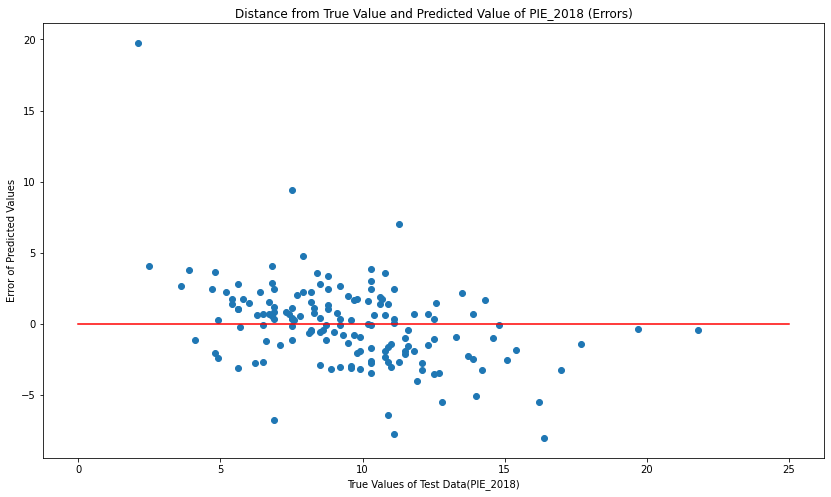

In [194]:
### Below is a graph of the model's predictions vs. their true values. We can see a few significant outliers

##### (note: how to I reconnect my model predictions back to the orginal datafame?( Yes, index remains) Analyze player names after all models run.



# Plot the predictions
# Build a scatterplot
plt.figure(figsize=(14,8))
plt.scatter(y_test,y_pred - y_test)
# Add a line for perfect correlation
plt.plot([0,25],[0,0],c='r')
# Label it nicely
plt.xlabel('True Values of Test Data(PIE_2018)')
plt.ylabel('Error of Predicted Values')
plt.title('Distance from True Value and Predicted Value of PIE_2018 (Errors)')
plt.show()

In [208]:
print('Most important model coefficients:')

pd.DataFrame(abs(bayes.coef_), X.columns, columns=['Coefficient'])\
             .sort_values(by='Coefficient', ascending=False).head(10)


Most important model coefficients:


,Coefficient
PIE_2017,0.802379
USG%,0.428888
DREB%,0.423019
FGM_5_9ft,0.328868
DD2,0.237369
FGM_und_5ft,0.214907
L,0.175680
FG%_und_5ft,0.160188
OPP_FG%_und_5ft,0.115885
cluster_five_4,0.112460


____
____
____
____

# Analysis/Review/Conclusion
____

## Consider evaluating models against training data to evaluate comparison between training and testing prediction results

### Consider Evaluating Model by comparing difference between predictions on training data and testing data.

In [188]:
### WAIT WHY IS IT BETTER SCORE ON TEST RATHER THAN TRAINING?

In [189]:
# Predictions on Training data

training_preds = bayes.predict(X_train)

training_scores = mean_squared_error(y_train, training_preds) ** 0.5, r2_score(y_train, training_preds)

print("RMSE: ", training_scores[0])
print("Explained Variance Score: ", training_scores[1])

RMSE:  2.515710502213607
Explained Variance Score:  0.544969604957396


### Hap Hazardly analzying results (previous more below, much got deleted)
___

### Investigating Worst Player Predictions (where did the model go wrong?)

In [203]:
# Importing unscaled dataframe 

unscaled = pd.read_csv('data/clean_nba_stats_data_with_PIE.csv')

# just extracting just the Player names and unscaled PIE_2017

unscaled = unscaled[['Player', 'PIE_2017']]

# getting index of test dataframe
test_df = df.loc[y_test.index]

# concatenating model predictions, error, and unscaled PIE_2017

test_df.insert(1,'predictions', e_preds)
test_df.insert(1,'diffs', abs(foo.predictions- foo.PIE_2018))
test_df.drop(columns='PIE_2017', inplace=True)
test_df = foo.merge(unscaled,on=['Player'], how='left')
test_df= foo[['Player','PIE_2017', 'PIE_2018', 'predictions', 'diffs']]
test_df = foo.sort_values(by='diffs', ascending=False)


#Looking at the 20 worst player predictions
test_df.head(20)

,Player,PIE_2017,PIE_2018,predictions,diffs
101,Wade Baldwin IV,9.4,2.1,9.722691,7.622691
21,JaKarr Sampson,8.7,16.2,9.044617,7.155383
111,Giannis Antetokounmpo,18.6,21.8,15.098883,6.701117
95,Andrew Harrison,8.3,2.5,8.218266,5.718266
142,Ekpe Udoh,7.2,12.5,7.274054,5.225946
5,Joakim Noah,11.4,14.2,9.176939,5.023061
97,Isaiah Thomas,7.7,3.9,8.825666,4.925666
147,Mike Conley,10.9,15.1,10.378673,4.721327
62,Ryan Anderson,7.7,3.6,8.247519,4.647519
152,Rudy Gobert,14.7,17.0,12.378672,4.621328


In [202]:

# (model is essentially predicting a regression towards the mean, which is 
# an observable statistical phenomenom, but does not account for individual player growth, 
# which I was hoping my model could capture.)

# for further model evaluation I should run model on unadvanced stats to see how much of 
# a diffference the advanced stats affected the model performance.